# Ex04

#### Objective:
Your Boss wants to make groups of customer type to make a commercial targeting
with offers by e-mails
- Make an Elbow Method to understand the ’optimal’ number of clusters to make
- You have to be able to explain how many clusters you choose and why


First we start importing the libraries and connecting to the DataBase:

In [28]:
# First of all, we have to import the necessary libraries
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [29]:
DB_NAME = "piscineds"
USER = "ojimenez"
PASSWORD = "mysecretpassword"
HOST = "localhost"
PORT = "5432"

# Let's connect with a SQLAlchemy engine (With psycopg2 we have a Warning):
engine_url = f"postgresql+psycopg2://{USER}:{PASSWORD}@{HOST}:{PORT}/{DB_NAME}"
engine = create_engine(engine_url)

try:
    with engine.connect() as connection:
        print("Connected to the database successfully!")
except Exception as e:
    print(f"Error connecting to the database: {e}")

Connected to the database successfully!


Let's do the groups of customer by the amount of purchases they do. We take only customers that purchased less than 100 times:

In [30]:
query = """
    SELECT user_id, COUNT(*) AS purchases
    FROM customers
    WHERE event_type = 'purchase'
    GROUP BY user_id
    HAVING COUNT(*) < 100
    ORDER BY purchases DESC;
"""

try:
    data = pd.read_sql(query, engine)
    print("Query executed successfully :)")
except Exception as e:
    print(f"Error: {e}")
finally:
    engine.dispose()

Query executed successfully :)


###  Let's see theorical explanation:

- __Elbow Method:__ Is a useful technique used to determine the optimal number of clusters in an algorithms like __K-Means__ . It balances clustering quality and model simplicity by calculating the Inertia (Within-Cluster Sum of Squares) for different values of k and identifying the "elbow point" where adding more clusters yields diminishing returns.

- __K-Means Training:__ A popular clustering algorithm that groups data into k clusters based on the similarity between data points. It works by iteratively assigning points to the nearest cluster centroid and recalculating centroids until convergence.

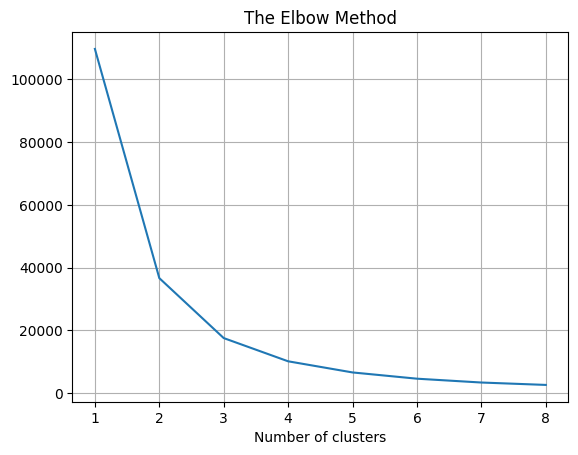

In [27]:
#print(data.head())
#print(data.describe())

# We create a list to store the Within-Cluster Sum of Squares (WCSS) for each value of k:
wss = []
data = data[['purchases']].values

# We scale to normalize the values
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# The n_init=10 runs the algorithm 10 times with different centroid seeds and selects the best result.
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(data_scaled)
    wss.append(kmeans.inertia_)

plt.plot(range(1, 9), wss)
plt.xlabel("Number of clusters")
plt.title("The Elbow Method")
plt.grid(True)
plt.show()


We use 8 clusters because the line is already close to 0 and if we use more we are adding computacional cost without a significant change.